# Aula 04 - Arvores de decisão e Randon Forest

## Objetivos Aula de hoje

* Arvore de decisão

* Entropia

* Visualização dos dados

* IRIS

* Train test split

* Randon Forest

In [1]:
import os, sys
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Árvores de decisão

![Tree](https://uvagpclass.files.wordpress.com/2017/10/whatsapp-image-2017-10-26-at-17-03-37.jpeg?w=736)

* É uma sequência de decisões lógicas em que separamos nossos dados em grupos baseado em condicionais
* À medida que avançamos nas condicionais, especificamos mais nossos dados 
* Abaixo temos um exemplo, onde dada uma posição, vamos classificar um ponto em um gráfico

In [74]:
n = 40

# Gerando pontos aleatórios
x = 2 * np.random.rand(n) - 1
y = 2 * np.random.rand(n) - 1
z = np.zeros([n])

Separando dados

In [75]:
for i in range(n):
    if x[i] > -0.5 and x[i] < 0.5 and y[i] > -0.5 and y[i] < 0.5:
        z[i] = 1

In [76]:
px.scatter(x=x, y=y, color=z, height=800, size=y+2)

## Entropia

* Medir a ordem ou desordem de algo (gases e moléculas) $ \to $ definição física
* À medida que separamos os dados, diminuimos a "entropia" dos dados que temos, pois estamos os organizando
* Os dados são separados utilizando retas, buscando a menor entropia possível

![Boltzman](https://www.researchgate.net/profile/Bahman-Zohuri/publication/327234817/figure/fig8/AS:726270384025602@1550167761738/Ludwig-Boltzmanns-grave-in-the-Zentralfriedhof-Vienna-Austria-bearing-the-entropy_Q640.jpg)

In [77]:
fig = px.scatter(x=x, y=y, color=z, height=800, size=y+2)
fig.add_vline(x=0.2)
fig.show()

$$ \large E = \sum{-p_i \cdot \log_2(p_i)} $$

$$ \large IG = E(parent) - \sum{w_i \cdot E(node)}  $$

### Realizando cálculo de entropia

* Inicialmente temos um sistema $ S_0$
* Ao traçarmos a primeira reta, obtemos um sistema $ S_1 $ e $ S_2 $
* A ideia parte do principio de encontrar a melhor reta que separe os dados
* <b style='color:red'>Observação</b>: O cálculo de entropia vai mudar conforme posicionamos a reta para a separação dos dados

In [91]:
# Calculando Entropia para S0

yellow_ball_prob_0 = 14 / 40
blue_ball_prob_0 = (40 - 14) / 40
E_0 = -yellow_ball_prob_0 * np.log2(yellow_ball_prob_0) + (-blue_ball_prob_0 * np.log2(blue_ball_prob_0))
E_0

0.934068055375491

In [94]:
# Calculando Entropia para S1 -> Metade da direita

yellow_ball_prob_1 = 6 / 15
blue_ball_prob_1 = 9 / 15

E_1 = -yellow_ball_prob_1 * np.log2(yellow_ball_prob_1) + (-blue_ball_prob_1 * np.log2(blue_ball_prob_1))
E_1

0.9709505944546686

In [93]:
# Calculando Entropia para S2 -> Metade da esquerda

yellow_ball_prob_2 = 8 / 25
blue_ball_prob_2 = (25 - 8) / 25

E_2 = -yellow_ball_prob_2 * np.log2(yellow_ball_prob_2) + (-blue_ball_prob_2 * np.log2(blue_ball_prob_2))
E_2

0.9043814577244937

## Iris dataset Visualization

In [28]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
iris.data.shape

(150, 4)

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width"
}, inplace=True)

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.corr().round(2)

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [44]:
px.imshow(df.corr(), height=600)

In [96]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Violin(x=df["target"], y=df["sepal_length"]),
    row=1, col=1
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["sepal_width"]),
    row=1, col=2
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["petal_length"]),
    row=2, col=1
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["petal_width"]),
    
    row=2, col=2
)

fig.update_xaxes(title_text="target", row=1, col=1)
fig.update_yaxes(title_text="sepal_length")

fig.update_xaxes(title_text="target", row=1, col=2)
fig.update_yaxes(title_text="sepal_width")

fig.update_xaxes(title_text="target", row=2, col=1)
fig.update_yaxes(title_text="petal_length")

fig.update_xaxes(title_text="target", row=2, col=2)
fig.update_yaxes(title_text="petal_width")

fig.update_layout(height=600, width=800, title_text="Distributions", showlegend=False)
fig.show()

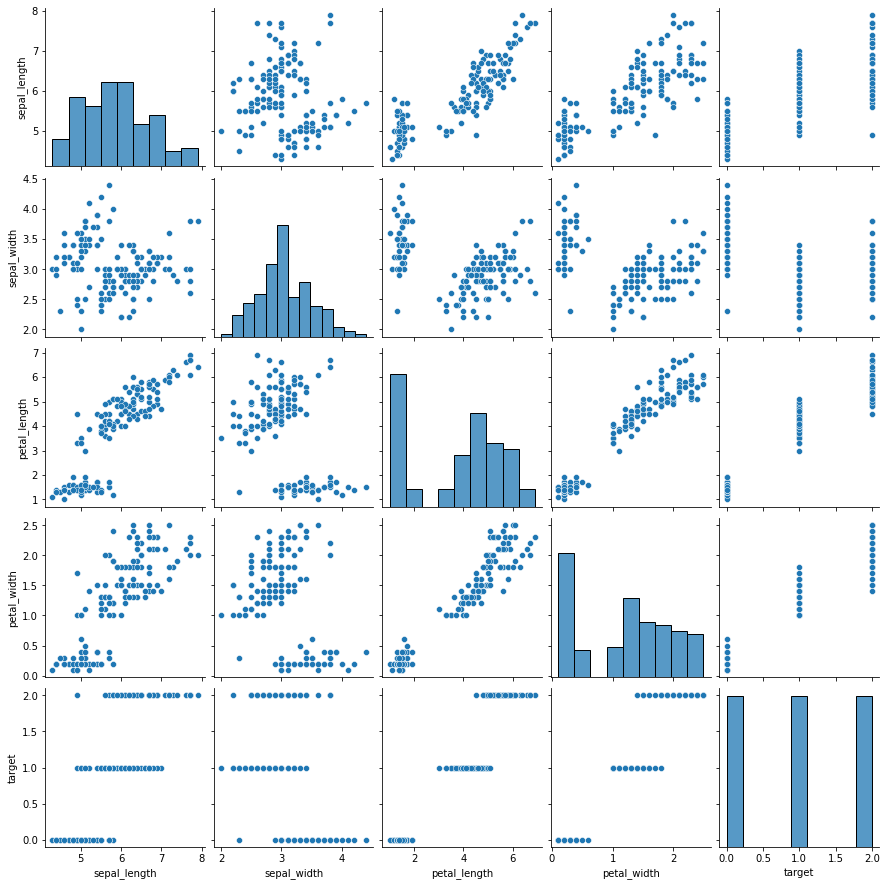

In [97]:
sns.pairplot(df)

## Arvore de decisão

In [46]:
classifier = DecisionTreeClassifier(random_state=42)

In [48]:
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier(random_state=42)

<b style="color: red">Atenção</b>: Aqui estamos prevendo valores que já conhecemos, pois foi com eles que treinamos!

In [49]:
iris_predict = classifier.predict(iris.data)

In [50]:
iris_predict == iris.target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [51]:
metrics.accuracy_score(iris_predict, iris.target)

1.0

## Split data

* Como vimos, não é útil tentar prever dados que já conhecemo. Por isso devemos separá-los em conjuntos diferentes

In [99]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=10)

In [100]:
classifier = DecisionTreeClassifier(random_state=10)

In [101]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [102]:
predict = classifier.predict(X_test)

In [103]:
predict

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [104]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [105]:
metrics.accuracy_score(predict, y_test)

0.9777777777777777

## Visualização Árvores de decisão

In [66]:
txt = tree.export_text(classifier)

In [68]:
print(txt)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [71]:
# !pip install dtreeviz

     |████████████████████████████████| 61 kB 57 kB/s  eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67681 sha256=9a26a9ed241f5897c502b1198207ec0435cc7b8a42f1483d530378f337096f7c
  Stored in directory: /home/luis/.cache/pip/wheels/df/4a/2d/4fb16c5a6fb72cf0754f406c97c7ba14eccb240a4dc4fc26b5
Successfully built dtreeviz


In [98]:
from dtreeviz.trees import dtreeviz

In [110]:
viz = dtreeviz(classifier, iris.data, iris.target,
              target_name="target",
              feature_names=iris.feature_names,
              class_names=list(iris.target_names))

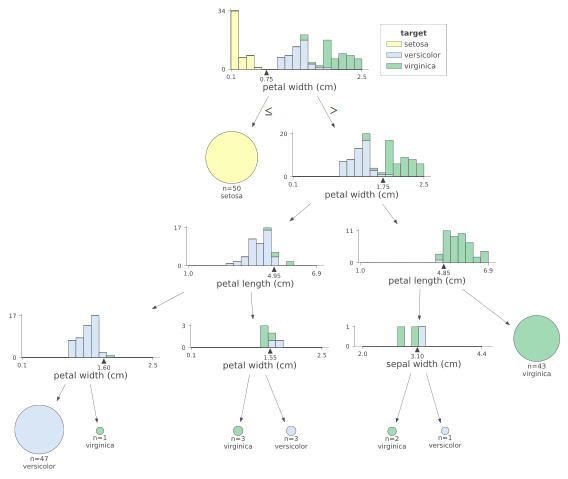

In [111]:
viz

## Randon Forest

* Boostrap

* menos features por arvore (também random)

* Agregação

In [69]:
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [70]:
predict = classifier.predict(X_test)
metrics.accuracy_score(predict, y_test)

0.9777777777777777

## Referências

* [Adicionando linha vertical no plotly](https://plotly.com/python/horizontal-vertical-shapes/)
* [Entropia](https://www.analyticsvidhya.com/blog/2020/11/entropy-a-key-concept-for-all-data-science-beginners/)
* [Subplots (plotly)](https://plotly.com/python/subplots/)